# Author - Anirban Chowdhury

###  GRIP @ The Sparks Foundation

#### Task-7 Stock Market Prediction using Numerical and Textual Analysis

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,confusion_matrix, accuracy_score, roc_curve, classification_report
from textblob import TextBlob

In [2]:
stock_price = pd.read_excel('nifty_data.xlsx')
stock_headlines = pd.read_csv('sentiment_data.csv')

In [3]:
stock_price.head()

,Date,Open,High,Low,Close,Adj. close
0,2001-01-02,1254.25,1279.60,1248.55,1271.80,1271.80
1,2001-01-03,1271.80,1293.55,1263.95,1291.25,1291.25
2,2001-01-04,1291.30,1331.35,1291.30,1307.65,1307.65
3,2001-01-05,1307.55,1330.30,1306.25,1327.25,1327.25
4,2001-01-08,1327.35,1334.20,1303.35,1309.25,1309.25


In [4]:
stock_headlines.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [5]:
# displaying number of records in both stock_price and stock_headlines datasets
len(stock_price), len(stock_headlines)

(2512, 1048575)

In [10]:
# Convert 'publish_date' to datetime with YYYY-MM-DD format
stock_headlines['publish_date'] = pd.to_datetime(stock_headlines['publish_date'], format='%Y%m%d')

print(stock_headlines)

        publish_date             headline_category  \
0         2001-01-02                       unknown   
1         2001-01-02                       unknown   
2         2001-01-02                       unknown   
3         2001-01-02                       unknown   
4         2001-01-02                       unknown   
...              ...                           ...   
1048570   2011-01-23                  city.lucknow   
1048571   2011-01-23                  city.lucknow   
1048572   2011-01-23                         india   
1048573   2011-01-23                  city.lucknow   
1048574   2011-01-23  home.sunday-times.deep-focus   

                                             headline_text  
0        Status quo will not be disturbed at Ayodhya; s...  
1                      Fissures in Hurriyat over Pak visit  
2                    America's unwanted heading for India?  
3                       For bigwigs; it is destination Goa  
4                     Extra buses to clear tou

In [12]:
# Merge based on 'Date' and 'publish_date' columns
merged_df = pd.merge(stock_price, stock_headlines, left_on='Date', right_on='publish_date', how='inner')

In [13]:
# Drop the redundant 'publish_date' column
merged_df.drop('publish_date', axis=1, inplace=True)

# Display the merged DataFrame
print(merged_df)

             Date     Open     High      Low   Close  Adj. close  \
0      2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
1      2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
2      2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
3      2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
4      2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
...           ...      ...      ...      ...     ...         ...   
739971 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   
739972 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   
739973 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   
739974 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   
739975 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   

       headline_category                                      headline_text  
0                unknown  Status quo will not be disturbed at Ayodhya; s...  
1                unknown   

In [15]:
merged_df.head()

,Date,Open,High,Low,Close,Adj. close,headline_category,headline_text
0,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,America's unwanted heading for India?
3,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,For bigwigs; it is destination Goa
4,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,Extra buses to clear tourist traffic


In [16]:
# Check for missing values in the merged dataset
missing_values = merged_df.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj. close           0
headline_category    0
headline_text        0
dtype: int64


In [27]:
# Create a DataFrame
df = pd.DataFrame(merged_df)

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to the 'headline_text' column
df['sentiment'] = df['headline_text'].apply(analyze_sentiment)

# Print the DataFrame with sentiment analysis results
print(df)

             Date     Open     High      Low   Close  Adj. close  \
0      2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
1      2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
2      2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
3      2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
4      2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
...           ...      ...      ...      ...     ...         ...   
739971 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   
739972 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   
739973 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   
739974 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   
739975 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   

       headline_category                                      headline_text  \
0                unknown  Status quo will not be disturbed at Ayodhya; s...   
1                unknown 

In [28]:
merged_df.head()

,Date,Open,High,Low,Close,Adj. close,headline_category,headline_text,sentiment
0,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,Status quo will not be disturbed at Ayodhya; s...,0.00
1,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,Fissures in Hurriyat over Pak visit,0.00
2,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,America's unwanted heading for India?,0.00
3,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,For bigwigs; it is destination Goa,0.00
4,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,Extra buses to clear tourist traffic,0.05


In [29]:
# Find null values in the DataFrame
null_values = merged_df.isnull()

# Drop rows with null values
merged_df.dropna(inplace=True)

# Print the DataFrame after dropping null values
print(merged_df)

             Date     Open     High      Low   Close  Adj. close  \
0      2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
1      2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
2      2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
3      2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
4      2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
...           ...      ...      ...      ...     ...         ...   
739971 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   
739972 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   
739973 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   
739974 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   
739975 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   

       headline_category                                      headline_text  \
0                unknown  Status quo will not be disturbed at Ayodhya; s...   
1                unknown 

In [30]:
merged_df.head()

,Date,Open,High,Low,Close,Adj. close,headline_category,headline_text,sentiment
0,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,Status quo will not be disturbed at Ayodhya; s...,0.00
1,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,Fissures in Hurriyat over Pak visit,0.00
2,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,America's unwanted heading for India?,0.00
3,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,For bigwigs; it is destination Goa,0.00
4,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,Extra buses to clear tourist traffic,0.05


In [32]:
null_counts = merged_df.isnull()
print("\nMissing Values in Merged Data:")
print(null_counts)


Missing Values in Merged Data:
         Date   Open   High    Low  Close  Adj. close  headline_category  \
0       False  False  False  False  False       False              False   
1       False  False  False  False  False       False              False   
2       False  False  False  False  False       False              False   
3       False  False  False  False  False       False              False   
4       False  False  False  False  False       False              False   
...       ...    ...    ...    ...    ...         ...                ...   
739971  False  False  False  False  False       False              False   
739972  False  False  False  False  False       False              False   
739973  False  False  False  False  False       False              False   
739974  False  False  False  False  False       False              False   
739975  False  False  False  False  False       False              False   

        headline_text  sentiment  
0               Fals

In [45]:
# Number of lag features (e.g., lag 1, lag 2, etc.)
num_lags = 5

# Create lag features for 'Close' price
for i in range(1, num_lags + 1):
    merged_df[f'lag_{i}_close'] = merged_df['Close'].shift(i)

# Drop rows with NaN values resulting from lag
merged_df.dropna(inplace=True)

# Print the DataFrame with lag features
print(merged_df)

             Date     Open     High      Low   Close  Adj. close  \
16     2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
17     2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
18     2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
19     2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
20     2001-01-02  1254.25  1279.60  1248.55  1271.8      1271.8   
...           ...      ...      ...      ...     ...         ...   
739971 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   
739972 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   
739973 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   
739974 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   
739975 2011-01-21  5692.05  5717.55  5674.50  5696.5      5696.5   

       headline_category                                      headline_text  \
16               unknown               BBC's reality TV will focus on AIIMS   
17               unknown 

In [46]:
merged_df.head()

,Date,Open,High,Low,Close,Adj. close,headline_category,headline_text,sentiment,lag_1_close,lag_2_close,lag_3_close,lag_4_close,lag_5_close
16,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,BBC's reality TV will focus on AIIMS,0.0,1271.8,1271.8,1271.8,1271.8,1271.8
17,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,Jaitley firm on legal reforms,0.0,1271.8,1271.8,1271.8,1271.8,1271.8
18,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,Hoshangabad farmers have enough water,0.0,1271.8,1271.8,1271.8,1271.8,1271.8
19,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,BJP jumps into rail track conversion issue,0.0,1271.8,1271.8,1271.8,1271.8,1271.8
20,2001-01-02,1254.25,1279.6,1248.55,1271.8,1271.8,unknown,America's unwanted heading for India?,0.0,1271.8,1271.8,1271.8,1271.8,1271.8


In [47]:
merged_df.describe()

,Open,High,Low,Close,Adj. close,sentiment,lag_1_close,lag_2_close,lag_3_close,lag_4_close,lag_5_close
count,739960.000000,739960.000000,739960.000000,739960.000000,739960.000000,739960.000000,739960.000000,739960.000000,739960.000000,739960.000000,739960.000000
mean,3328.643658,3365.074420,3291.156906,3329.507080,3329.507080,0.024609,3329.501100,3329.495120,3329.489141,3329.483161,3329.477181
std,1736.137576,1751.217899,1718.617758,1735.513799,1735.513799,0.190186,1735.513266,1735.512734,1735.512201,1735.511668,1735.511135
min,853.000000,877.000000,849.950000,854.200000,854.200000,-1.000000,854.200000,854.200000,854.200000,854.200000,854.200000
25%,1520.400000,1543.850000,1504.000000,1520.800000,1520.800000,0.000000,1520.800000,1520.800000,1520.800000,1520.800000,1520.800000
50%,3391.850000,3484.650000,3351.500000,3413.900000,3413.900000,0.000000,3413.900000,3413.900000,3413.900000,3413.900000,3413.900000
75%,4942.150000,4984.950000,4873.700000,4940.500000,4940.500000,0.000000,4940.500000,4940.500000,4940.500000,4940.500000,4940.500000
max,6335.250000,6357.100000,6303.100000,6312.450000,6312.450000,1.000000,6312.450000,6312.450000,6312.450000,6312.450000,6312.450000


In [49]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739960 entries, 16 to 739975
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               739960 non-null  datetime64[ns]
 1   Open               739960 non-null  float64       
 2   High               739960 non-null  float64       
 3   Low                739960 non-null  float64       
 4   Close              739960 non-null  float64       
 5   Adj. close         739960 non-null  float64       
 6   headline_category  739960 non-null  object        
 7   headline_text      739960 non-null  object        
 8   sentiment          739960 non-null  float64       
 9   lag_1_close        739960 non-null  float64       
 10  lag_2_close        739960 non-null  float64       
 11  lag_3_close        739960 non-null  float64       
 12  lag_4_close        739960 non-null  float64       
 13  lag_5_close        739960 non-null  float64

In [55]:
# Splitting into features (lag features and headlines) and target (Close price)
X = merged_df[['lag_1_close', 'lag_2_close', 'lag_3_close', 'lag_4_close', 'lag_5_close', 'sentiment']]
y = merged_df['Close']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 12.218784041688005
R-squared: 0.9999959416736124


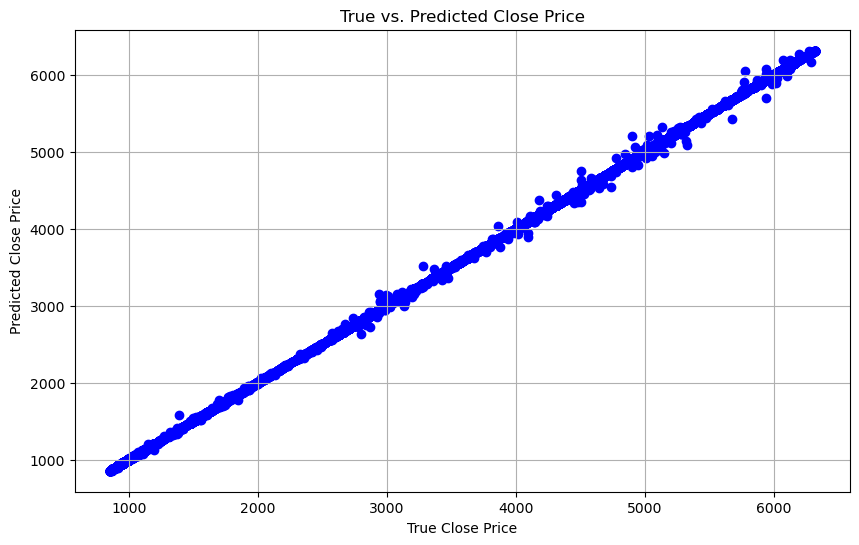

In [69]:
# Visualizing the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("True Close Price")
plt.ylabel("Predicted Close Price")
plt.title("True vs. Predicted Close Price")
plt.grid(True)
plt.show()

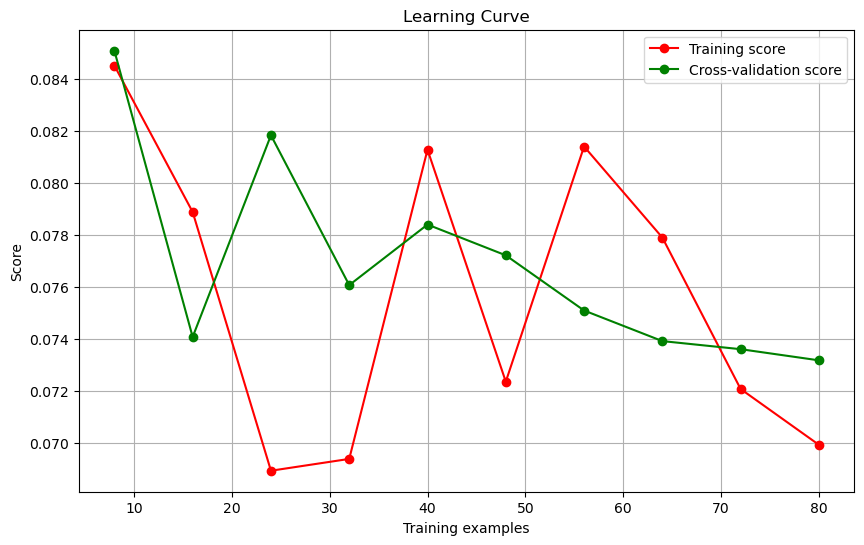

In [72]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_regression

# Function to plot learning curves
def plot_learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), scoring=None):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, scoring=scoring)

    return train_sizes, train_scores, test_scores

    from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Create a sample dataset (replace with your own data)
X, y = make_regression(n_samples=100, n_features=1, noise=0.3, random_state=42)

# Create and fit your estimator (replace with your own estimator)
estimator = LinearRegression()
estimator.fit(X, y)

# Generate learning curve data
train_sizes, train_scores, test_scores = plot_learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error')

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.grid(True)
plt.show()